In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

output_data_file = "C:\\Users\\Ryan\\Desktop\\SARS.csv"
with open(output_data_file, "r", encoding="utf-8") as read_file:
    sarsData = pd.read_csv(read_file)

sarsDF = pd.DataFrame(sarsData)

sarsDF


,Date,Month,Day,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,"April 1, 2003",April,1,Australia,1,0,0
1,"April 2, 2003",April,2,Australia,1,0,0
2,"April 3, 2003",April,3,Australia,1,0,0
3,"April 4, 2003",April,4,Australia,1,0,0
4,"April 5, 2003",April,5,Australia,1,0,0
...,...,...,...,...,...,...,...
2533,"July 7, 2003",July,7,Viet Nam,63,5,58
2534,"July 8, 2003",July,8,Viet Nam,63,5,58
2535,"July 9, 2003",July,9,Viet Nam,63,5,58
2536,"July 10, 2003",July,10,Viet Nam,63,5,58


In [2]:
newdf = sarsDF.groupby("Country")["Cumulative number of case(s)"].max()

newdf = pd.DataFrame(newdf).reset_index()

topdf = newdf.loc[newdf["Cumulative number of case(s)"] >= 100]

topdf



,Country,Cumulative number of case(s)
4,Canada,252
5,China,5329
10,"Hong Kong SAR, China",1755
26,Singapore,206
32,"Taiwan, China",698
35,United States,220


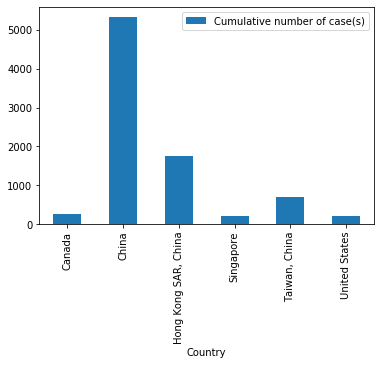

In [3]:
barplot = topdf.plot.bar(x="Country", y="Cumulative number of case(s)")

barplot

In [4]:
output_data_file = "C:\\Users\\Ryan\\Desktop\\Countries.csv"
with open(output_data_file, "r", encoding="utf-8") as read_file:
    countriesData = pd.read_csv(read_file)

countriesDF = pd.DataFrame(countriesData)

countriesDF

,Countries List,Populations 2003
0,Australia,"19,731,984"
1,Belgium,"10,289,088"
2,Brazil,"182,032,604"
3,Bulgaria,"7,537,929"
4,Canada,"32,207,113"
5,China,"1,286,975,468"
6,Colombia,"41,662,073"
7,Finland,"5,190,785"
8,France,"60,180,529"
9,Germany,"82,398,326"


In [5]:
deaths = sarsDF.groupby("Country")["Number of deaths"].max()

deaths = pd.DataFrame(deaths).reset_index()

deaths

,Country,Number of deaths
0,Australia,0
1,Belgium,0
2,Brazil,0
3,Bulgaria,0
4,Canada,38
5,China,348
6,Colombia,0
7,Finland,0
8,France,1
9,Germany,0


In [6]:
recovered = sarsDF.groupby("Country")["Number recovered"].max()

recovered = pd.DataFrame(recovered).reset_index()

recovered

,Country,Number recovered
0,Australia,6
1,Belgium,0
2,Brazil,2
3,Bulgaria,0
4,Canada,194
5,China,4941
6,Colombia,1
7,Finland,1
8,France,6
9,Germany,9


In [7]:
mainDF = pd.merge(left= topdf, right=countriesDF, how='left', left_on='Country', right_on='Countries List')

mainDF

,Country,Cumulative number of case(s),Countries List,Populations 2003
0,Canada,252,NaN,NaN
1,China,5329,China,"1,286,975,468"
2,"Hong Kong SAR, China",1755,"Hong Kong SAR, China","7,394,170"
3,Singapore,206,Singapore,"4,608,595"
4,"Taiwan, China",698,"Taiwan, China","22,603,001"
5,United States,220,United States,"290,342,554"


In [8]:
mainDF = pd.merge(left= mainDF, right=deaths, how='left', left_on='Country', right_on='Country')

mainDF

,Country,Cumulative number of case(s),Countries List,Populations 2003,Number of deaths
0,Canada,252,NaN,NaN,38
1,China,5329,China,"1,286,975,468",348
2,"Hong Kong SAR, China",1755,"Hong Kong SAR, China","7,394,170",298
3,Singapore,206,Singapore,"4,608,595",32
4,"Taiwan, China",698,"Taiwan, China","22,603,001",84
5,United States,220,United States,"290,342,554",0


In [9]:
mainDF = pd.merge(left= mainDF, right=recovered, how='left', left_on='Country', right_on='Country')

mainDF

,Country,Cumulative number of case(s),Countries List,Populations 2003,Number of deaths,Number recovered
0,Canada,252,NaN,NaN,38,194
1,China,5329,China,"1,286,975,468",348,4941
2,"Hong Kong SAR, China",1755,"Hong Kong SAR, China","7,394,170",298,1433
3,Singapore,206,Singapore,"4,608,595",32,172
4,"Taiwan, China",698,"Taiwan, China","22,603,001",84,507
5,United States,220,United States,"290,342,554",0,67


In [10]:
output_data_file = "C:\\Users\\Ryan\\Desktop\\topSARS.csv"
with open(output_data_file, "r", encoding="utf-8") as read_file:
    sars = pd.read_csv(read_file)

topSARS = pd.DataFrame(sars)

topSARS

,Date,Month,Day,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,17-Mar-03,March,17,Canada,8,2,0
1,18-Mar-03,March,18,Canada,8,2,0
2,19-Mar-03,March,19,Canada,8,2,0
3,20-Mar-03,March,20,Canada,9,2,0
4,21-Mar-03,March,21,Canada,9,2,0
...,...,...,...,...,...,...,...
626,7-Jul-03,July,7,United States,73,0,65
627,8-Jul-03,July,8,United States,74,0,64
628,9-Jul-03,July,9,United States,75,0,67
629,10-Jul-03,July,10,United States,75,0,67


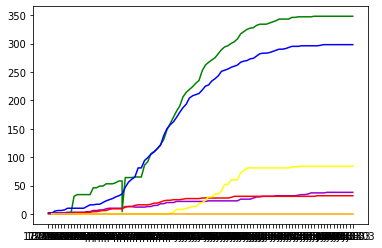

In [18]:
#Deaths by Country over Time Period 

#Canada
canada =topSARS.loc[topSARS["Country"]=="Canada"]
canadaDeaths= canada['Number of deaths']
xAxis1=canada["Date"]
yAxis1=canadaDeaths
line1 = plt.plot(xAxis1, yAxis1, color="darkviolet", label="Canada")

#China
china =topSARS.loc[topSARS["Country"]=="China"]
chinaDeaths= china['Number of deaths']
xAxis2=china["Date"]
yAxis2=chinaDeaths
line2 = plt.plot(xAxis2, yAxis2, color="green", label="China")

#Hong Kong 
hk =topSARS.loc[topSARS["Country"]=="Hong Kong SAR, China"]
hkDeaths= hk['Number of deaths']
xAxis3=hk["Date"]
yAxis3=hkDeaths
line3 = plt.plot(xAxis3, yAxis3, color="blue", label="Hong Kong")

#Singapore 
singapore =topSARS.loc[topSARS["Country"]=="Singapore"]
singaporeDeaths= singapore['Number of deaths']
xAxis4=singapore["Date"]
yAxis4=singaporeDeaths
line4 = plt.plot(xAxis4, yAxis4, color="red", label="Singapore")

#Taiwan
taiwan =topSARS.loc[topSARS["Country"]=="Taiwan, China"]
taiwanDeaths= taiwan['Number of deaths']
xAxis5=taiwan["Date"]
yAxis5=taiwanDeaths
line5 = plt.plot(xAxis5, yAxis5, color="yellow", label="Taiwan")

#USA
usa =topSARS.loc[topSARS["Country"]=="United States"]
usaDeaths= usa['Number of deaths']
xAxis6=usa["Date"]
yAxis6=usaDeaths
line6 = plt.plot(xAxis6, yAxis6, color="orange", label="United States")


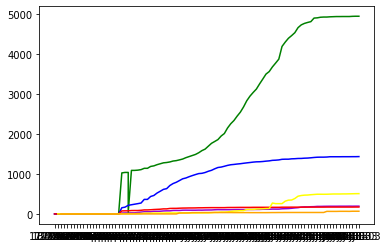

In [20]:
#Recovered by Country over Time Period 

#Canada
canada =topSARS.loc[topSARS["Country"]=="Canada"]
canadaRecov= canada['Number recovered']
xAxis1=canada["Date"]
yAxis1=canadaRecov
line1 = plt.plot(xAxis1, yAxis1, color="darkviolet", label="Canada")

#China
china =topSARS.loc[topSARS["Country"]=="China"]
chinaRecov= china['Number recovered']
xAxis2=china["Date"]
yAxis2=chinaRecov
line2 = plt.plot(xAxis2, yAxis2, color="green", label="China")

#Hong Kong 
hk =topSARS.loc[topSARS["Country"]=="Hong Kong SAR, China"]
hkRecov= hk['Number recovered']
xAxis3=hk["Date"]
yAxis3=hkRecov
line3 = plt.plot(xAxis3, yAxis3, color="blue", label="Hong Kong")

#Singapore 
singapore =topSARS.loc[topSARS["Country"]=="Singapore"]
singaporeRecov= singapore['Number recovered']
xAxis4=singapore["Date"]
yAxis4=singaporeRecov
line4 = plt.plot(xAxis4, yAxis4, color="red", label="Singapore")

#Taiwan
taiwan =topSARS.loc[topSARS["Country"]=="Taiwan, China"]
taiwanRecov= taiwan['Number recovered']
xAxis5=taiwan["Date"]
yAxis5=taiwanRecov
line5 = plt.plot(xAxis5, yAxis5, color="yellow", label="Taiwan")

#USA
usa =topSARS.loc[topSARS["Country"]=="United States"]
usaRecov= usa['Number recovered']
xAxis6=usa["Date"]
yAxis6=usaRecov
line6 = plt.plot(xAxis6, yAxis6, color="orange", label="United States")


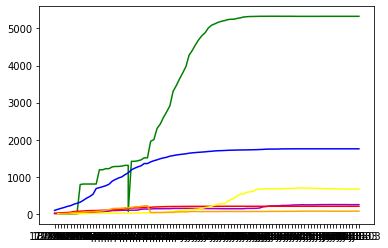

In [22]:
#Cases by Country over Time Period 

#Canada
canada =topSARS.loc[topSARS["Country"]=="Canada"]
canadaCases= canada['Cumulative number of case(s)']
xAxis1=canada["Date"]
yAxis1=canadaCases
line1 = plt.plot(xAxis1, yAxis1, color="darkviolet", label="Canada")

#China
china =topSARS.loc[topSARS["Country"]=="China"]
chinaCases= china['Cumulative number of case(s)']
xAxis2=china["Date"]
yAxis2=chinaCases
line2 = plt.plot(xAxis2, yAxis2, color="green", label="China")

#Hong Kong 
hk =topSARS.loc[topSARS["Country"]=="Hong Kong SAR, China"]
hkCases= hk['Cumulative number of case(s)']
xAxis3=hk["Date"]
yAxis3=hkCases
line3 = plt.plot(xAxis3, yAxis3, color="blue", label="Hong Kong")

#Singapore 
singapore =topSARS.loc[topSARS["Country"]=="Singapore"]
singaporeCases= singapore['Cumulative number of case(s)']
xAxis4=singapore["Date"]
yAxis4=singaporeCases
line4 = plt.plot(xAxis4, yAxis4, color="red", label="Singapore")

#Taiwan
taiwan =topSARS.loc[topSARS["Country"]=="Taiwan, China"]
taiwanCases= taiwan['Cumulative number of case(s)']
xAxis5=taiwan["Date"]
yAxis5=taiwanCases
line5 = plt.plot(xAxis5, yAxis5, color="yellow", label="Taiwan")

#USA
usa =topSARS.loc[topSARS["Country"]=="United States"]
usaCases= usa['Cumulative number of case(s)']
xAxis6=usa["Date"]
yAxis6=usaCases
line6 = plt.plot(xAxis6, yAxis6, color="orange", label="United States")